In [23]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from fa2 import ForceAtlas2

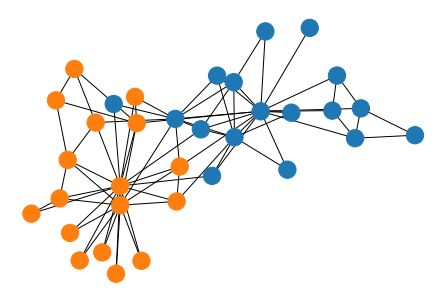

In [31]:
karate_parts = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
karate = nx.read_gml("karate.gml", label='id')
#G = nx.convert_node_labels_to_integers(G)
karate_color_map = [sns.color_palette()[x] for x in karate_parts]
nx.draw(karate, node_color=karate_color_map, with_labels=False)
#plt.show()
plt.savefig('karate_graph.png')

In [7]:
def __read_partition_file(path: str):
  file = open(path)
  lines = file.readlines()
  nodes = []
  for line in lines:
      line = int(line.strip())
      nodes.append(line)
  return nodes

def get_partitions(dataset):
  return __read_partition_file(os.path.join('partitioning', 'metis', 'left', dataset+'.txt')), __read_partition_file(os.path.join('partitioning', 'metis', 'right', dataset+'.txt'))

def get_parts_array(dataset, g):
    left_part, right_part = get_partitions(dataset)
    partition = np.zeros(g.number_of_nodes(), dtype='int')
    for n in left_part:
        partition[n] = 1
    return partition


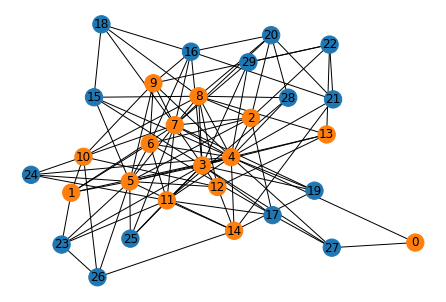

In [19]:
g = nx.barabasi_albert_graph(30, 4)
parts = np.zeros(30, dtype='int')
for i in range(15):
    parts[i] = 1
color_map = [sns.color_palette()[x] for x in parts]
nx.draw(g, node_color=color_map, with_labels=True, width=1)
plt.show()

In [22]:
nx.write_gml(g, 'barabasi_example.gml')


In [28]:
def force_atlas_fa2(g: nx.Graph, iterations: int):
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=1.0,

        # Log
        verbose=True)

    return forceatlas2.forceatlas2_networkx_layout(g, pos=None, iterations=iterations)

def draw_plot(positions, partition, title):
    embeddinga = []
    embeddingb = []
    for i in list(positions.values()):
        embeddinga.append(i[0])
        embeddingb.append(i[1])
    plt.scatter(embeddinga, embeddingb, c=[sns.color_palette()[x] for x in partition], alpha=0.5)
    plt.title(title)
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 7143.11it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.04  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


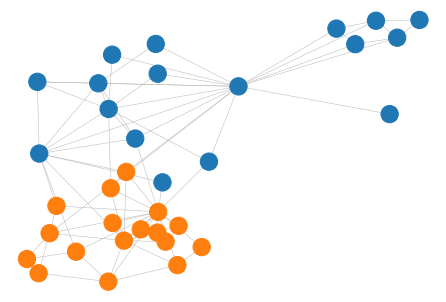

In [107]:
#draw_plot(force_atlas_fa2(karate, 100), karate_parts, 'ForceAtlas2 (EC: 0.635)')
nx.draw(karate, pos=force_atlas_fa2(karate, 500), node_color=karate_color_map, width=0.5, edge_color='#B8B8B8' )
plt.savefig('karate_graph.png', dpi=1000)

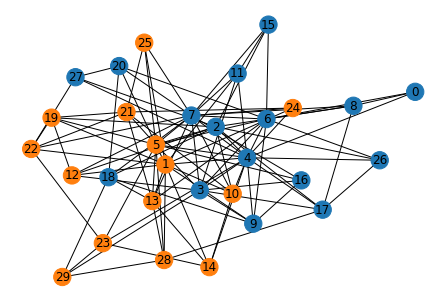

In [74]:
gb = nx.read_gml("barabasi_example.gml", label='id')
parts = np.zeros(30, dtype='int')
barabasi_parts = [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
barabasi_color_map = [sns.color_palette()[x] for x in barabasi_parts]
nx.draw(gb, node_color=barabasi_color_map, with_labels=True, width=1)
plt.show()

100%|██████████| 100/100 [00:00<00:00, 7693.43it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


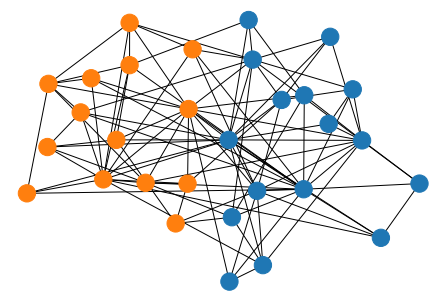

In [81]:
nx.draw(gb, pos=force_atlas_fa2(gb, 100), node_color=barabasi_color_map)
plt.savefig('barabasi_graph.png')

100%|██████████| 100/100 [00:00<00:00, 7695.26it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


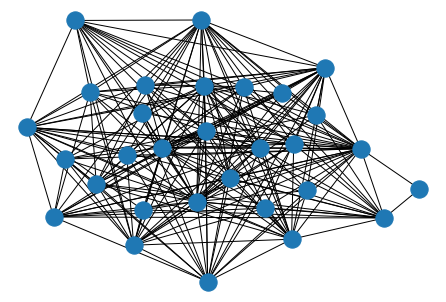

In [87]:
bcg = nx.barabasi_albert_graph(30, 15)
nx.draw(bcg, pos=force_atlas_fa2(bcg, 100))


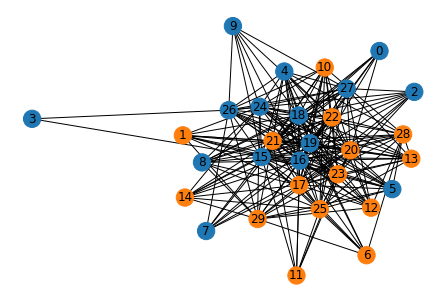

In [90]:
barabasi_3015 = nx.read_gml("barabasi_3015.gml", label='id') 
barabasi_3015_parts = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
barabasi_3015_color_map = [sns.color_palette()[x] for x in barabasi_3015_parts]
nx.draw(barabasi_3015, node_color=barabasi_3015_color_map, with_labels=True, width=1)
plt.show()

100%|██████████| 100/100 [00:00<00:00, 6250.64it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


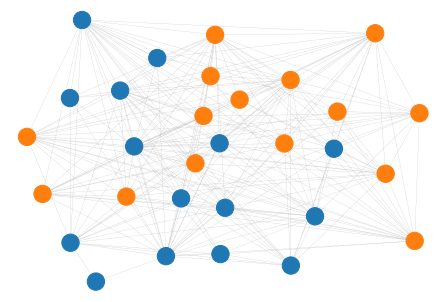

In [109]:
nx.draw(barabasi_3015, pos=force_atlas_fa2(barabasi_3015, 100), node_color=barabasi_3015_color_map, width=0.2, edge_color='#B8B8B8')
plt.savefig('barabasi_3015_graph.png', dpi=1000)